In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

import fmm

In [14]:
import importlib
importlib.reload(fmm)

<module 'fmm' from '/Users/liambrown/repositories/computing-project-lb880/fmm.py'>

In [9]:
num_particles = 4

p=4
max_level=10

n_crit=2

particles = [fmm.Particle() for _ in range(num_particles)]

root = fmm.RootCell(0.5*(1+1j),1,p,max_level)

root.do_fmm(particles, n_crit)


In [10]:
fmm.direct_particle_potentials(particles)

potentials = [particle.potential for particle in particles]
direct_potentials = [particle.direct_potential for particle in particles]

potential_err = list(np.array(potentials) - np.array(direct_potentials))


In [11]:
print([particle.centre for particle in particles])
print('Dir:', direct_potentials)
print('FMM:', potentials)
print('Err:', potential_err)

[(0.5982158148928335+0.6798111018728114j), (0.6297427066719102+0.8005589481099589j), (0.48715124315649605+0.20594481944665788j), (0.331828646924358+0.7201521810051846j)]
Dir: [1.5530033525928555, -0.7266706265698635, 0.2011257897706768, -0.14882879127118576]
FMM: [(1.2821977866330394+0j), (-1.0255920689327367+0j), (0.2011257897706768+0j), (-0.14882879127118576+0j)]
Err: [(-0.2708055659598161+0j), (-0.2989214423628732+0j), 0j, 0j]


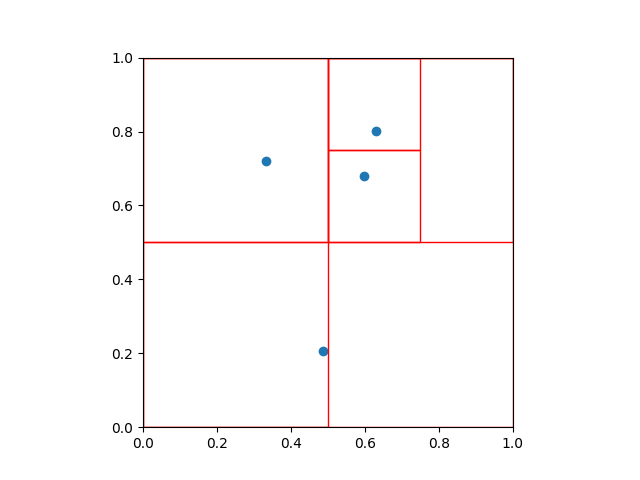

In [12]:
fmm.plot(root)

In [ ]:
for cell in root.cells[1:]:
    print(cell)
    print('\t', cell.multipole, cell.local)

print()

for particle in particles:
    print(particle.potential)

In [ ]:
# particles = []
# particles.append(Particle(1, 0.25*(1+1j)))
# particles.append(Particle(2, 0.25*(3+1j)))
# particles.append(Particle(-2, 0.25*(1+3j)))
# particles.append(Particle(-3, 0.25*(3+3j)))

In [ ]:
for cell in cells:
    cell.multipole = np.zeros(p,dtype=complex)

root._calculate_multipole()
direct = root.multipole

root.multipole = np.zeros(p, dtype=complex)

for cell in reversed(cells):
    cell.get_multipole()
M2M = root.multipole

err = (M2M - direct)/abs(direct)
print(direct)
print(M2M)
print(err)
np.sum(abs(err))

In [ ]:
"""Shows numpy method is equivalent to explicit"""

z0 = -1+2j
precision = 3

multipole_for = np.zeros(precision, dtype=complex)
multipole_np = np.zeros(precision, dtype=complex)

child_multipole_real = np.random.random(precision)
child_multipole_imag = np.random.random(precision)
child_multipole = child_multipole_real + 1j*child_multipole_imag
child_multipole[0] = child_multipole[0].real

multipole_for[0] += child_multipole[0]
multipole_np[0] += child_multipole[0]

for l in range(1, precision):
    bl = - child_multipole[0] * z0**l / l
    for k in range(1,l+1):
        bl += child_multipole[k] * z0**(l-k) * sp.special.binom(l-1,k-1)
    multipole_for[l] += bl

    multipole_np[l] += \
    -(child_multipole[0] * z0**l / l) \
        + np.sum(child_multipole[1:l+1] \
                    * z0**(l-np.arange(1,l+1,1)) \
                    * sp.special.binom(l-1, np.arange(0,l,1)))

    
print(multipole_for)
print(multipole_np)